<a href="https://colab.research.google.com/github/aditsijoshi/SureStart2021/blob/main/Day15_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Downloading & Preparing Data

In [1]:
from google.colab import files
import pandas as pd
import seaborn as sns
import numpy as np 
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from  IPython.display import display
import plotly.express as px

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout, experimental, MaxPool2D, BatchNormalization
from tensorflow.keras.losses import sparse_categorical_crossentropy, binary_crossentropy
from tensorflow.keras.optimizers import Adam
# from tensorflow.keras.callbacks import ReduceLROnPlateau 
from tensorflow.data import Dataset
from tensorflow.keras import Input, Model
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.utils import to_categorical
from tensorflow import test

In [7]:
age_gender_data = pd.read_csv("/content/age_gender.csv")
age_gender_data.info()
age_gender_data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2785 entries, 0 to 2784
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        2785 non-null   int64 
 1   ethnicity  2785 non-null   int64 
 2   gender     2785 non-null   int64 
 3   img_name   2785 non-null   object
 4   pixels     2785 non-null   object
dtypes: int64(3), object(2)
memory usage: 108.9+ KB


,age,ethnicity,gender,img_name,pixels
0,1,2,0,20161219203650636.jpg.chip.jpg,129 128 128 126 127 130 133 135 139 142 145 14...
1,1,2,0,20161219222752047.jpg.chip.jpg,164 74 111 168 169 171 175 182 184 188 193 199...
2,1,2,0,20161219222832191.jpg.chip.jpg,67 70 71 70 69 67 70 79 90 103 116 132 145 155...
3,1,2,0,20161220144911423.jpg.chip.jpg,193 197 198 200 199 200 202 203 204 205 208 21...
4,1,2,0,20161220144914327.jpg.chip.jpg,202 205 209 210 209 209 210 211 212 214 218 21...


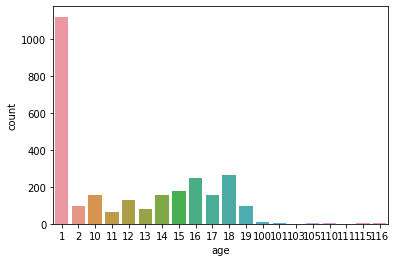

In [22]:
# plots age distribution in dataset
sns.countplot(x='age', data=age_gender_data)

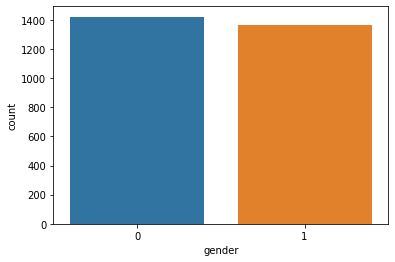

In [24]:
# plots gender distribution in dataset
sns.countplot(x='gender', data=age_gender_data)

### Data Preprocessing

In [25]:
print(age_gender_data.iloc[0,:])

age                                                          1
ethnicity                                                    2
gender                                                       0
img_name                        20161219203650636.jpg.chip.jpg
pixels       129 128 128 126 127 130 133 135 139 142 145 14...
Name: 0, dtype: object


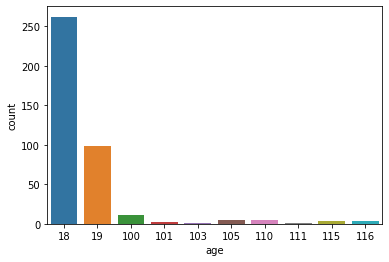

In [26]:
### try with filtering female >=16 & males >=18 ###

# Select only people who are 18 or older
age_gender_data = age_gender_data[age_gender_data['age'] >= 18]

# plots age distribution in  dataset
sns.countplot(x='age', data=age_gender_data)

In [27]:
# resets index values after dropping rows where age < 18
age_gender_data.reset_index(drop=True, inplace=True)
age_gender_data

,age,ethnicity,gender,img_name,pixels
0,100,0,0,20170112213500903.jpg.chip.jpg,203 185 139 163 176 184 186 175 175 156 159 13...
1,100,0,0,20170112215240346.jpg.chip.jpg,125 126 115 78 66 66 77 85 95 102 117 138 138 ...
2,100,0,1,20170110183726390.jpg.chip.jpg,235 164 113 144 121 201 243 237 234 221 233 23...
3,100,0,1,20170112213001988.jpg.chip.jpg,82 82 82 82 82 82 84 86 90 85 104 105 102 154 ...
4,100,0,1,20170112213303693.jpg.chip.jpg,70 72 94 149 154 166 175 169 172 161 176 187 2...
...,...,...,...,...,...
387,19,0,1,20170117140530071.jpg.chip.jpg,40 42 45 44 45 49 49 51 59 56 73 112 143 156 1...
388,19,0,1,20170119145731470.jpg.chip.jpg,235 148 78 82 86 99 125 148 158 167 171 178 18...
389,19,0,1,20170112231655238.jpg.chip.jpg,80 114 144 153 165 161 162 163 166 170 174 176...
390,19,1,1,20170112191242381.jpg.chip.jpg,86 83 84 84 86 87 88 86 89 91 92 90 89 89 88 8...


In [28]:
# checks for null data; if there was null data we would have to remove that row
age_gender_data.isnull().sum() 

age          0
ethnicity    0
gender       0
img_name     0
pixels       0
dtype: int64

In [29]:
# Input image configuration
# finds dimesnions of image so we can configure it into an array
num_pixels = len(age_gender_data['pixels'][0].split(' '))
dimension = int(np.sqrt(num_pixels))
img_width = dimension
img_height = dimension

print("Pixels: {}".format(num_pixels))
print("Width: {0}, Height: {1}".format(img_width, img_height))

Pixels: 2304
Width: 48, Height: 48


In [31]:
# Splitting dataset into X and y values
X_img = age_gender_data.iloc[:,4].copy()
y_age = age_gender_data.iloc[:,0].copy()
y_ethnicity = age_gender_data.iloc[:,1].copy()
y_gender = age_gender_data.iloc[:,2].copy()

In [32]:
# splitting the data into train and test sets.
X_train, X_tests, y_train, y_tests = train_test_split(X_img,y_gender,test_size=0.3,random_state=11)

# splitting test set into validation and test set
X_val, X_test, y_val, y_test = train_test_split(X_tests,y_tests,test_size=0.15,random_state=11)

In [33]:
def str_to_npArr(x):
    '''
    Function to convert pixel data (string) into numpy_array of pixels
    '''
    x = x.reset_index(drop=True)

    #converting data to numpy array
    x = x.apply(lambda x: np.array(x.split(), dtype="float32")) 

    return np.array([x[i].reshape(img_width, img_height, 1) for i in range(x.shape[0])])

# Converting the string of pixels into image array for each of train, val and test set and normalization
X_train = str_to_npArr(X_train)
X_test = str_to_npArr(X_test)
X_val = str_to_npArr(X_val)

print("Traget: shape = (16593, 48, 48, 1), type = <class 'numpy.ndarray'>")
print("Current: shape = {}, type = {}".format(X_train.shape, type(X_train)))

Traget: shape = (16593, 48, 48, 1), type = <class 'numpy.ndarray'>
Current: shape = (274, 48, 48, 1), type = <class 'numpy.ndarray'>


In [34]:
# establishes input and output values
# we are only classifying gender which is why we split data prior
target_columns = ['gender', 'ethnicity', 'age']

age_gender_data_preprocess = age_gender_data.drop('img_name', axis=1)
y = age_gender_data_preprocess[target_columns]
x = age_gender_data_preprocess.drop(target_columns, axis=1)

print(x)
print("--------------------------------------------------------")
print(y)

                                                pixels
0    203 185 139 163 176 184 186 175 175 156 159 13...
1    125 126 115 78 66 66 77 85 95 102 117 138 138 ...
2    235 164 113 144 121 201 243 237 234 221 233 23...
3    82 82 82 82 82 82 84 86 90 85 104 105 102 154 ...
4    70 72 94 149 154 166 175 169 172 161 176 187 2...
..                                                 ...
387  40 42 45 44 45 49 49 51 59 56 73 112 143 156 1...
388  235 148 78 82 86 99 125 148 158 167 171 178 18...
389  80 114 144 153 165 161 162 163 166 170 174 176...
390  86 83 84 84 86 87 88 86 89 91 92 90 89 89 88 8...
391  56 46 43 57 82 98 110 122 127 133 135 141 147 ...

[392 rows x 1 columns]
--------------------------------------------------------
     gender  ethnicity  age
0         0          0  100
1         0          0  100
2         1          0  100
3         1          0  100
4         1          0  100
..      ...        ...  ...
387       1          0   19
388       1          0   19
389    

In [35]:
#converting data to numpy array
x = x['pixels'].apply(lambda x: np.array(x.split(), dtype="float32")) 

# normalization
x = np.array(x)/255.0 
x = np.array([ x[i].reshape(48,48,1) for i in range(x.shape[0]) ])

print("Traget: X Shape: {}".format(x.shape))
print("Current: X Shape: {}".format(x.shape))

Traget: X Shape: (392, 48, 48, 1)
Current: X Shape: (392, 48, 48, 1)


In [36]:
y_gender = np.array(y['gender'])
y_ethnicity = np.array(y['ethnicity'])
y_age = np.array(y['age'])

### Data Visualization

In [37]:
import random
import matplotlib.pyplot as plt # plotting
%matplotlib inline

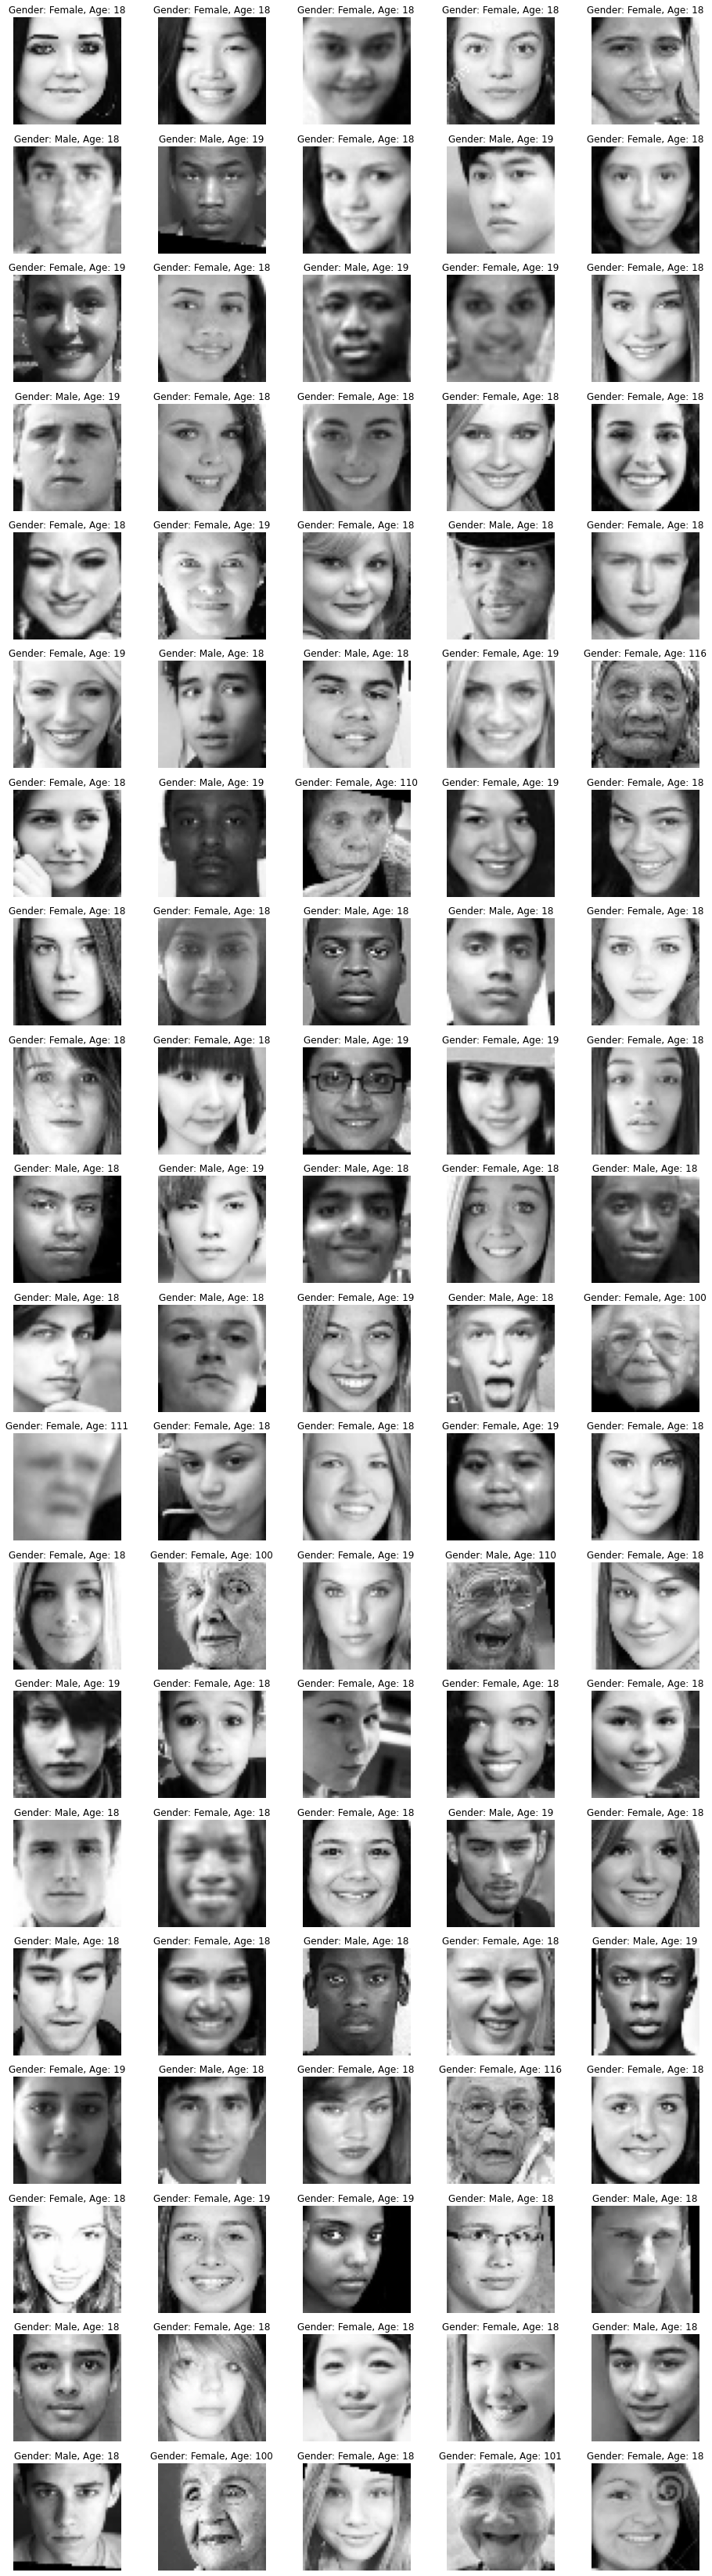

In [38]:
# rows in subplots
rows = 20 

# columns in subplots
cols = 5 

# selects 100 random images to sample
samp = random.sample(range(x.shape[0]),rows*cols)
x_samp = x[samp,:,:,:]
y_samp_gender = y_gender[samp]
y_samp_age = y_age[samp]
    
fig,ax = plt.subplots(rows,cols,figsize=(16,60))
r = 0
c = 0   

for i in range(rows*cols):
    aa = x_samp[i,:,:,:].reshape(48,48)
    ax[r,c].axis("off")
    ax[r,c].imshow(aa,cmap="gray")
    ax[r,c].set_title(f"Gender: {'Female' if y_samp_gender[i]==1 else 'Male'}, Age: {y_samp_age[i]}")
    c+=1
    if c == cols:
        c=0
        r+=1
        
plt.show()

### Image Augmentation

In [39]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.random import set_seed

In [40]:
# Generates augmented training data
train_data_gen = ImageDataGenerator(rotation_range=30,
                                   width_shift_range=1,
                                    brightness_range=[0.8,1.2],
                                    zoom_range=[0.8,1.2],
                                    rescale=1/255
                                   )

# Generates augmented validation data
val_data_gen = ImageDataGenerator(rescale=1/255)

# Generates augmented testing data
test_data_gen = ImageDataGenerator(rescale=1/255)

In [41]:
set_seed(11)
random.seed(11)
np.random.seed(11)

val_data = val_data_gen.flow(X_val,y_val,
                                   seed=11,shuffle=False)

test_data = test_data_gen.flow(X_test,y_test,
                                   seed=11,shuffle=False)

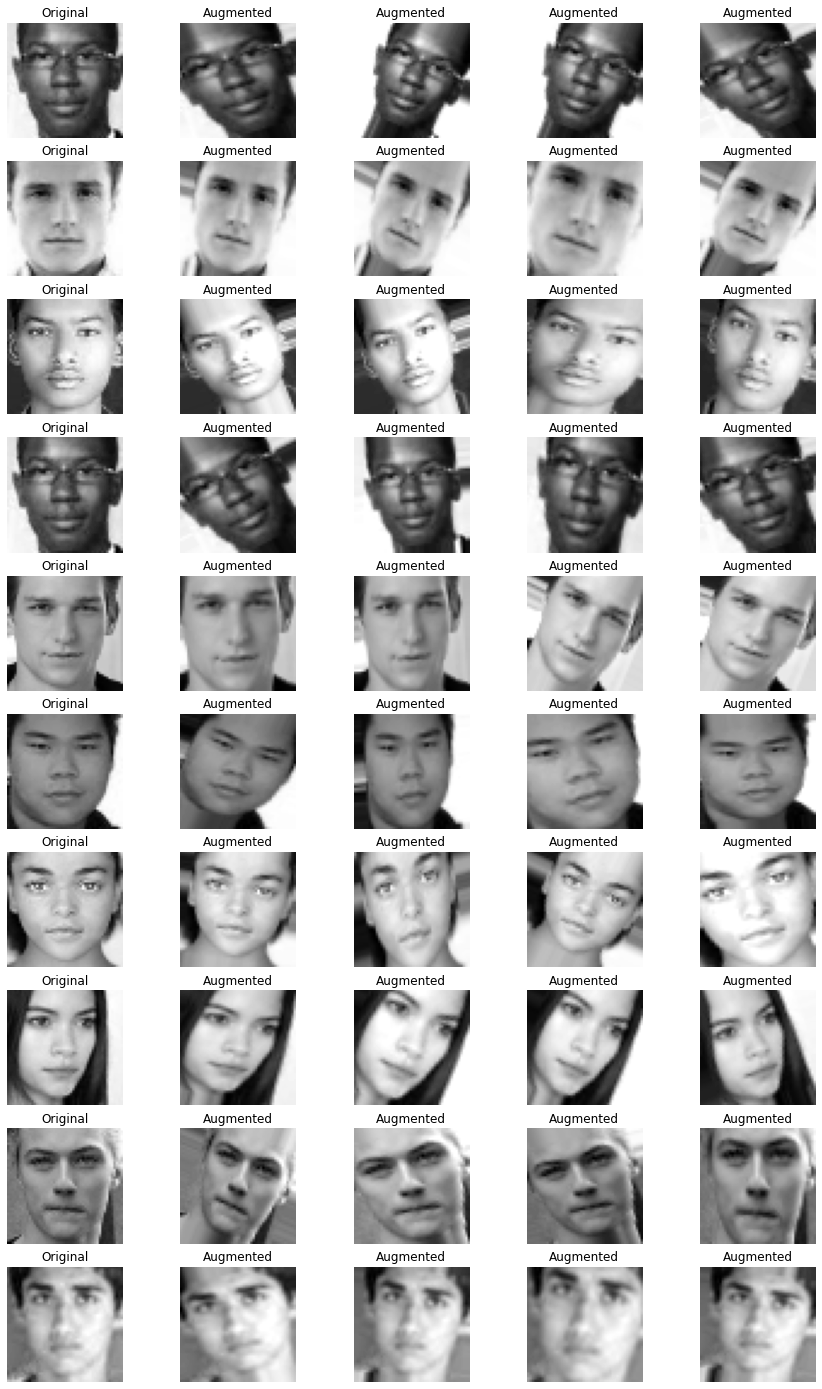

In [42]:
fig,ax = plt.subplots(10,5,figsize=(15,25))
for n in range(10):    
    r = random.sample(range(x.shape[0]),1)[0]
    ax[n,0].imshow(x[r].reshape(48,48),cmap="gray")
    ax[n,0].set_title("Original")
    ax[n,0].axis("off")
    for i in range(1,5):
        ax[n,i].imshow(train_data_gen.random_transform(x[r]).reshape(48,48),cmap="gray")
        ax[n,i].set_title("Augmented")
        ax[n,i].axis("off")
plt.show()

In [51]:
# Model configuration variables
batch_size = 32
img_width, img_height, img_num_channels = 48, 48, 1
# when do we define loss function inputs?
loss_function = sparse_categorical_crossentropy
no_classes = 2
no_epochs = 50
optimizer = Adam()
verbosity = 1
num_folds = 10
activation='softmax'

# Determine shape of the data
input_shape = (img_width, img_height, img_num_channels)
print(input_shape)

(48, 48, 1)


In [52]:
# Set Seed
random.seed(11)
set_seed(11)
np.random.seed(11)

# Define the K-fold Cross Validator
# If we already defined our validation data, why do we need this?
kfold = KFold(n_splits=num_folds, shuffle=True)

In [46]:
# Define per-fold score containers
acc_per_fold = []
loss_per_fold = []

# K-fold Cross Validation model evaluation
fold_no = 1
for train, test in kfold.split(x, y_gender):
    
  # Set Seed
  random.seed(11)
  set_seed(11)
  np.random.seed(11)
  
  # Define the model architecture
  model = Sequential()
  
  model.add(Conv2D(64, kernel_size=(3,3), input_shape=input_shape, activation='relu'))
  model.add(MaxPooling2D(pool_size=(2,2)))
  model.add(BatchNormalization())

  for size in [128, 256]:

    model.add(Conv2D(size, kernel_size=(3,3), activation='relu', padding='same'))
    model.add(Conv2D(size, kernel_size=(3,3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Dropout(0.3))
    model.add(BatchNormalization())

  model.add(Conv2D(512, kernel_size=(3,3), activation='relu', padding='same'))
  model.add(MaxPooling2D(pool_size=(2,2)))
  model.add(Dropout(0.5))
  model.add(BatchNormalization())

  model.add(Flatten())
  model.add(Dense(128, activation='relu'))
  model.add(Dense(128, activation='softmax'))

  # Compile the model
  model.compile(loss=loss_function,
              optimizer=optimizer,
              metrics=['accuracy'])
  
  # Generate a print
  print('------------------------------------------------------------------------')
  print(f'Training for fold {fold_no} ...')
    
  # Ensure the model doesn't overfit
  early_stop = EarlyStopping(monitor="val_loss",patience=5,mode="min") 
  
  # Set Seed
  random.seed(11)
  set_seed(11)
  np.random.seed(11)
    
  # Fit data to model
  history = model.fit(train_data_gen.flow(x[train], y_gender[train], seed=11),
            callbacks=early_stop,
            batch_size=batch_size,
            epochs=no_epochs,
            verbose=verbosity,
            validation_data=train_data_gen.flow(x[test], y_gender[test],
                                   seed=11))
  
  # Generate generalization metrics
  # I don't understand the graph
  fig = px.line(
  history.history, y=['loss', 'val_loss'],
  labels={'index': 'epoch', 'value': 'loss'}, 
  title='Training History')
  fig.show()
    
  scores = model.evaluate(train_data_gen.flow(x[test], y_gender[test],
                                   seed=11), verbose=0)
  print(f'Score for fold {fold_no}: {model.metrics_names[0]} of {scores[0]}; {model.metrics_names[1]} of {scores[1]*100}%')
  acc_per_fold.append(scores[1] * 100)
  loss_per_fold.append(scores[0])
  
  # Increase fold number
  fold_no = fold_no + 1

------------------------------------------------------------------------
Training for fold 1 ...
Epoch 1/50
11/11 [==============================] - 34s 79ms/step - loss: 4.2877 - accuracy: 0.2067 - val_loss: 3.9563 - val_accuracy: 0.7000
Epoch 2/50
11/11 [==============================] - 0s 28ms/step - loss: 0.9429 - accuracy: 0.6493 - val_loss: 2.6470 - val_accuracy: 0.2000
Epoch 3/50
11/11 [==============================] - 0s 29ms/step - loss: 0.6223 - accuracy: 0.6994 - val_loss: 2.1142 - val_accuracy: 0.3250
Epoch 4/50
11/11 [==============================] - 0s 29ms/step - loss: 0.6467 - accuracy: 0.6898 - val_loss: 1.7091 - val_accuracy: 0.5500
Epoch 5/50
11/11 [==============================] - 0s 28ms/step - loss: 0.4927 - accuracy: 0.7959 - val_loss: 1.0635 - val_accuracy: 0.3000
Epoch 6/50
11/11 [==============================] - 0s 28ms/step - loss: 0.5099 - accuracy: 0.7392 - val_loss: 0.9685 - val_accuracy: 0.7250
Epoch 7/50
11/11 [==============================] - 0s 2

Score for fold 1: loss of 1.0148292779922485; accuracy of 25.0%
------------------------------------------------------------------------
Training for fold 2 ...
Epoch 1/50
11/11 [==============================] - 1s 54ms/step - loss: 3.5920 - accuracy: 0.3231 - val_loss: 6.4314 - val_accuracy: 0.3250
Epoch 2/50
11/11 [==============================] - 0s 29ms/step - loss: 0.7722 - accuracy: 0.6985 - val_loss: 6.2004 - val_accuracy: 0.6750
Epoch 3/50
11/11 [==============================] - 0s 29ms/step - loss: 0.8423 - accuracy: 0.6669 - val_loss: 1.4462 - val_accuracy: 0.4250
Epoch 4/50
11/11 [==============================] - 0s 29ms/step - loss: 0.6632 - accuracy: 0.7144 - val_loss: 0.7666 - val_accuracy: 0.6750
Epoch 5/50
11/11 [==============================] - 0s 29ms/step - loss: 0.5492 - accuracy: 0.7320 - val_loss: 1.0615 - val_accuracy: 0.6750
Epoch 6/50
11/11 [==============================] - 0s 28ms/step - loss: 0.6538 - accuracy: 0.6865 - val_loss: 1.6613 - val_accuracy: 

Score for fold 2: loss of 0.6620829105377197; accuracy of 64.99999761581421%
------------------------------------------------------------------------
Training for fold 3 ...
Epoch 1/50
12/12 [==============================] - 2s 76ms/step - loss: 3.5380 - accuracy: 0.3253 - val_loss: 6.3037 - val_accuracy: 0.6667
Epoch 2/50
12/12 [==============================] - 0s 26ms/step - loss: 1.2102 - accuracy: 0.6648 - val_loss: 5.7390 - val_accuracy: 0.3333
Epoch 3/50
12/12 [==============================] - 0s 26ms/step - loss: 0.6559 - accuracy: 0.7516 - val_loss: 2.3137 - val_accuracy: 0.4103
Epoch 4/50
12/12 [==============================] - 0s 27ms/step - loss: 0.5879 - accuracy: 0.7359 - val_loss: 0.9865 - val_accuracy: 0.6667
Epoch 5/50
12/12 [==============================] - 0s 28ms/step - loss: 0.6549 - accuracy: 0.6875 - val_loss: 1.6845 - val_accuracy: 0.6667
Epoch 6/50
12/12 [==============================] - 0s 27ms/step - loss: 0.6625 - accuracy: 0.7304 - val_loss: 1.4697 - v

Score for fold 3: loss of 1.1541669368743896; accuracy of 33.33333432674408%
------------------------------------------------------------------------
Training for fold 4 ...
Epoch 1/50
12/12 [==============================] - 1s 45ms/step - loss: 3.4890 - accuracy: 0.3352 - val_loss: 26.0266 - val_accuracy: 0.7692
Epoch 2/50
12/12 [==============================] - 0s 26ms/step - loss: 1.1352 - accuracy: 0.5826 - val_loss: 1.6388 - val_accuracy: 0.5641
Epoch 3/50
12/12 [==============================] - 0s 28ms/step - loss: 0.8184 - accuracy: 0.6816 - val_loss: 11.3766 - val_accuracy: 0.7949
Epoch 4/50
12/12 [==============================] - 0s 27ms/step - loss: 0.6948 - accuracy: 0.7245 - val_loss: 4.0325 - val_accuracy: 0.7949
Epoch 5/50
12/12 [==============================] - 0s 30ms/step - loss: 0.6794 - accuracy: 0.6964 - val_loss: 1.6071 - val_accuracy: 0.7692
Epoch 6/50
12/12 [==============================] - 0s 29ms/step - loss: 0.6478 - accuracy: 0.7089 - val_loss: 0.7318 -

Score for fold 4: loss of 0.692000687122345; accuracy of 48.71794879436493%
------------------------------------------------------------------------
Training for fold 5 ...
Epoch 1/50
12/12 [==============================] - 1s 47ms/step - loss: 3.4991 - accuracy: 0.3271 - val_loss: 52.4192 - val_accuracy: 0.7692
Epoch 2/50
12/12 [==============================] - 0s 29ms/step - loss: 1.2094 - accuracy: 0.6014 - val_loss: 4.6071 - val_accuracy: 0.7949
Epoch 3/50
12/12 [==============================] - 0s 28ms/step - loss: 0.6806 - accuracy: 0.7178 - val_loss: 15.0931 - val_accuracy: 0.2308
Epoch 4/50
12/12 [==============================] - 0s 29ms/step - loss: 0.8231 - accuracy: 0.6805 - val_loss: 0.7291 - val_accuracy: 0.6410
Epoch 5/50
12/12 [==============================] - 0s 28ms/step - loss: 0.7160 - accuracy: 0.6810 - val_loss: 2.0006 - val_accuracy: 0.2308
Epoch 6/50
12/12 [==============================] - 0s 27ms/step - loss: 0.6458 - accuracy: 0.6672 - val_loss: 0.5682 - 

Score for fold 5: loss of 0.7011001706123352; accuracy of 51.28205418586731%
------------------------------------------------------------------------
Training for fold 6 ...
Epoch 1/50
12/12 [==============================] - 1s 45ms/step - loss: 3.4130 - accuracy: 0.3250 - val_loss: 24.0768 - val_accuracy: 0.7692
Epoch 2/50
12/12 [==============================] - 0s 27ms/step - loss: 1.0233 - accuracy: 0.6219 - val_loss: 1.4589 - val_accuracy: 0.7436
Epoch 3/50
12/12 [==============================] - 0s 29ms/step - loss: 0.9747 - accuracy: 0.6189 - val_loss: 1.4374 - val_accuracy: 0.7692
Epoch 4/50
12/12 [==============================] - 0s 26ms/step - loss: 0.6884 - accuracy: 0.6851 - val_loss: 2.2274 - val_accuracy: 0.7692
Epoch 5/50
12/12 [==============================] - 0s 28ms/step - loss: 0.5920 - accuracy: 0.6667 - val_loss: 0.9000 - val_accuracy: 0.7692
Epoch 6/50
12/12 [==============================] - 0s 28ms/step - loss: 0.5673 - accuracy: 0.7182 - val_loss: 1.9357 - 

Score for fold 6: loss of 0.7893440127372742; accuracy of 43.589743971824646%
------------------------------------------------------------------------
Training for fold 7 ...
Epoch 1/50
12/12 [==============================] - 1s 47ms/step - loss: 3.3756 - accuracy: 0.3602 - val_loss: 70.4020 - val_accuracy: 0.5897
Epoch 2/50
12/12 [==============================] - 0s 29ms/step - loss: 1.0684 - accuracy: 0.6344 - val_loss: 45.2836 - val_accuracy: 0.5897
Epoch 3/50
12/12 [==============================] - 0s 27ms/step - loss: 1.0237 - accuracy: 0.6673 - val_loss: 5.9519 - val_accuracy: 0.3846
Epoch 4/50
12/12 [==============================] - 0s 28ms/step - loss: 0.5372 - accuracy: 0.7335 - val_loss: 2.2319 - val_accuracy: 0.5897
Epoch 5/50
12/12 [==============================] - 0s 28ms/step - loss: 0.5596 - accuracy: 0.7063 - val_loss: 4.7023 - val_accuracy: 0.5897
Epoch 6/50
12/12 [==============================] - 0s 27ms/step - loss: 0.5221 - accuracy: 0.7432 - val_loss: 0.8455 

Score for fold 7: loss of 0.7319810390472412; accuracy of 41.025641560554504%
------------------------------------------------------------------------
Training for fold 8 ...
Epoch 1/50
12/12 [==============================] - 1s 44ms/step - loss: 3.3654 - accuracy: 0.3614 - val_loss: 34.0483 - val_accuracy: 0.3077
Epoch 2/50
12/12 [==============================] - 0s 27ms/step - loss: 1.0586 - accuracy: 0.6378 - val_loss: 3.9866 - val_accuracy: 0.3590
Epoch 3/50
12/12 [==============================] - 0s 28ms/step - loss: 0.7370 - accuracy: 0.6680 - val_loss: 0.7738 - val_accuracy: 0.6154
Epoch 4/50
12/12 [==============================] - 0s 27ms/step - loss: 0.5472 - accuracy: 0.6964 - val_loss: 0.7645 - val_accuracy: 0.6410
Epoch 5/50
12/12 [==============================] - 0s 28ms/step - loss: 0.5821 - accuracy: 0.7104 - val_loss: 0.9337 - val_accuracy: 0.6410
Epoch 6/50
12/12 [==============================] - 0s 27ms/step - loss: 0.5386 - accuracy: 0.7137 - val_loss: 0.8499 -

Score for fold 8: loss of 0.8694383502006531; accuracy of 33.33333432674408%
------------------------------------------------------------------------
Training for fold 9 ...
Epoch 1/50
12/12 [==============================] - 1s 46ms/step - loss: 3.4655 - accuracy: 0.3120 - val_loss: 56.9845 - val_accuracy: 0.5641
Epoch 2/50
12/12 [==============================] - 0s 29ms/step - loss: 1.7008 - accuracy: 0.5534 - val_loss: 0.7190 - val_accuracy: 0.7949
Epoch 3/50
12/12 [==============================] - 0s 28ms/step - loss: 0.6730 - accuracy: 0.7068 - val_loss: 7.1884 - val_accuracy: 0.5641
Epoch 4/50
12/12 [==============================] - 0s 27ms/step - loss: 0.6508 - accuracy: 0.6951 - val_loss: 4.9389 - val_accuracy: 0.5641
Epoch 5/50
12/12 [==============================] - 0s 28ms/step - loss: 0.7228 - accuracy: 0.6421 - val_loss: 5.5337 - val_accuracy: 0.5641
Epoch 6/50
12/12 [==============================] - 0s 28ms/step - loss: 0.6305 - accuracy: 0.7081 - val_loss: 0.9216 - 

Score for fold 9: loss of 0.762481689453125; accuracy of 53.84615659713745%
------------------------------------------------------------------------
Training for fold 10 ...
Epoch 1/50
12/12 [==============================] - 1s 44ms/step - loss: 3.4228 - accuracy: 0.3375 - val_loss: 162.8800 - val_accuracy: 0.3590
Epoch 2/50
12/12 [==============================] - 0s 27ms/step - loss: 1.9081 - accuracy: 0.5675 - val_loss: 4.9338 - val_accuracy: 0.6154
Epoch 3/50
12/12 [==============================] - 0s 28ms/step - loss: 0.9404 - accuracy: 0.6539 - val_loss: 2.6358 - val_accuracy: 0.5897
Epoch 4/50
12/12 [==============================] - 0s 28ms/step - loss: 0.8190 - accuracy: 0.7027 - val_loss: 2.0000 - val_accuracy: 0.6667
Epoch 5/50
12/12 [==============================] - 0s 29ms/step - loss: 0.6483 - accuracy: 0.6712 - val_loss: 0.9016 - val_accuracy: 0.6667
Epoch 6/50
12/12 [==============================] - 0s 29ms/step - loss: 0.6467 - accuracy: 0.6638 - val_loss: 0.9599 -

Score for fold 10: loss of 0.7019436359405518; accuracy of 53.84615659713745%


In [47]:
# Set Seed
random.seed(11)
set_seed(11)
np.random.seed(11)
  
# Define the model architecture
model = Sequential()

model.add(Conv2D(64, kernel_size=(3,3), input_shape=input_shape, activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())

for size in [128, 256]:

  model.add(Conv2D(size, kernel_size=(3,3), activation='relu', padding='same'))
  model.add(Conv2D(size, kernel_size=(3,3), activation='relu'))
  model.add(MaxPooling2D(pool_size=(2,2)))
  model.add(Dropout(0.3))
  model.add(BatchNormalization())

model.add(Conv2D(512, kernel_size=(3,3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.5))
model.add(BatchNormalization())

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(128, activation='softmax'))

# Compile the model
model.compile(loss=loss_function,
            optimizer=optimizer,
            metrics=['accuracy'])

Final_train = np.append(X_train, X_val, axis=0)
Final_val = np.append(y_train, y_val, axis=0)
final_training_data = train_data_gen.flow(Final_train, Final_val,
                                   seed=11)

random.seed(11)
set_seed(11)
np.random.seed(11)
final_model_history = model.fit(train_data_gen.flow(x, y_gender, seed=11),batch_size=32,epochs=20, validation_data=val_data)

Epoch 1/20
13/13 [==============================] - 2s 66ms/step - loss: 3.2488 - accuracy: 0.3586 - val_loss: 264.4409 - val_accuracy: 0.3000
Epoch 2/20
13/13 [==============================] - 0s 26ms/step - loss: 1.0097 - accuracy: 0.6671 - val_loss: 10.5381 - val_accuracy: 0.7000
Epoch 3/20
13/13 [==============================] - 0s 26ms/step - loss: 0.7748 - accuracy: 0.5915 - val_loss: 1.8291 - val_accuracy: 0.6800
Epoch 4/20
13/13 [==============================] - 0s 27ms/step - loss: 0.5650 - accuracy: 0.7358 - val_loss: 0.7714 - val_accuracy: 0.6000
Epoch 5/20
13/13 [==============================] - 0s 26ms/step - loss: 0.5512 - accuracy: 0.7139 - val_loss: 0.6988 - val_accuracy: 0.5700
Epoch 6/20
13/13 [==============================] - 0s 27ms/step - loss: 0.5072 - accuracy: 0.7416 - val_loss: 0.7406 - val_accuracy: 0.5200
Epoch 7/20
13/13 [==============================] - 0s 27ms/step - loss: 0.5501 - accuracy: 0.7100 - val_loss: 0.6572 - val_accuracy: 0.6900
Epoch 8/20

In [48]:
# Generate generalization metrics
fig = px.line(
final_model_history.history, y=['loss', 'val_loss'],
labels={'index': 'epoch', 'value': 'val_loss'}, 
title='Training History')
fig.show()


# Generate generalization metrics
fig = px.line(
final_model_history.history, y=['accuracy', 'val_accuracy'],
labels={'index': 'epoch', 'value': 'accuracy'}, 
title='Training History')
fig.show()

In [68]:
model.save("backup")

INFO:tensorflow:Assets written to: backup/assets


In [70]:
# Metrics
model.evaluate(test_data)

1/1 [==============================] - 0s 29ms/step - loss: 0.4912 - accuracy: 0.8889


[0.49115800857543945, 0.8888888955116272]

In [71]:
y_pred = model.predict_classes(test_data)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning:

`model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).



In [72]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.78      1.00      0.88         7
           1       1.00      0.82      0.90        11

    accuracy                           0.89        18
   macro avg       0.89      0.91      0.89        18
weighted avg       0.91      0.89      0.89        18



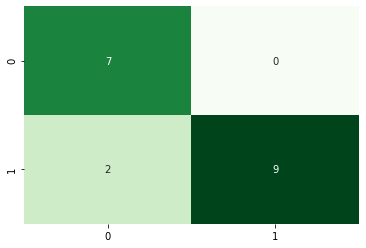

In [73]:
# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, cmap='Greens', cbar=False, annot=True, fmt='d')

In [60]:
import cv2

In [74]:
# finding error indices
error_index = (y_test != y_pred)
y_test_error = y_test[error_index]
X_test_error = X_test[error_index]
prediction_error = y_pred[error_index]

In [76]:
#rows in subplots
rows=int(np.floor(sum(error_index)/3)) 
#columns in subplots
cols=3 
x_samp = X_test_error
y_samp = y_test_error

# plots incorrect predictions
fig,ax = plt.subplots(rows,cols,figsize=(15,50))
r = 0
c = 0
for i in range((rows*cols)-1):
    aa = x_samp[i].reshape(48,48)
    ax[r,c].axis("off")
    ax[r,c].imshow(aa,cmap="gray")
    actual_lab = "Female" if y_samp.iloc[i]==1 else "Male"
    pred_lab = "Female" if int(prediction_error[i])==1 else "Male"
    ax[r,c].set_title(f'Actual: {actual_lab}\nPred: {pred_lab}')
    c+=1
    if c == cols:
        c=0
        r+=1
plt.show()

<Figure size 1080x3600 with 0 Axes>